In [1]:
# 导入工具包
import networkx as nx
import seaborn as sns

import pandas as pd
import numpy as np
import random

import matplotlib.pyplot as plt
%matplotlib inline

sns.set(style='white')
sns.set_palette(['#046586', '#28A9A1', '#C9A77C', '#F4A016', '#F6BBC6', '#E71F19'])  # Nature 配色
# %matplotlib inline
# %config InlineBackend.figure_format = 'svg'
plt.rcParams['figure.figsize'] = (5, 4)  # 2.24, 2.24 设置figure_size尺寸
plt.rcParams['savefig.dpi'] = 300  # 图片像素
plt.rcParams['figure.dpi'] = 100  # 分辨率
plt.rcParams['font.sans-serif'] = 'SimHei'  # 显示中文
# plt.rcParams['font.sans-serif'] = 'Times New Roman'  # 论文插图用
# 设置正常显示字符
plt.rcParams['axes.unicode_minus'] = False  #正常显示负号
# plt.rcParams['font.size'] = 60

In [2]:
# PageRank结点重要度

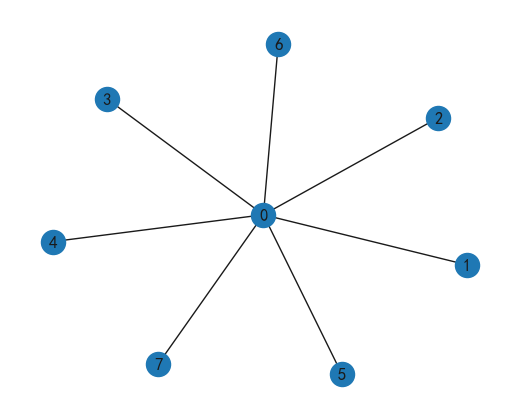

In [6]:
G = nx.star_graph(7)
nx.draw(G, with_labels=True)

In [7]:
#### 计算PageRank结点重要度

In [8]:
pagerank = nx.pagerank(G, alpha=0.8)
pagerank

{0: 0.4583348922684132,
 1: 0.07738072967594098,
 2: 0.07738072967594098,
 3: 0.07738072967594098,
 4: 0.07738072967594098,
 5: 0.07738072967594098,
 6: 0.07738072967594098,
 7: 0.07738072967594098}

In [9]:
# 结点连接数Node Degree度分析

In [2]:
#### 创建图

In [3]:
# 创建 Erods-Renyi 随机图，也称作binomial graph
# n-节点数
# p-任意两个结点产生连接的概率

G = nx.gnp_random_graph(100, 0.02, seed=2023)

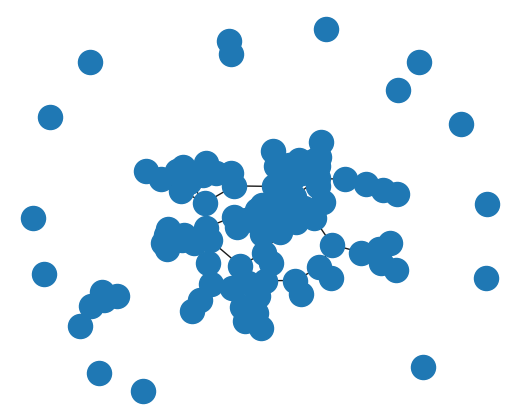

In [4]:
# 初步可视化
pos = nx.spring_layout(G, seed=2023)
nx.draw(G, pos)

In [5]:
# 最大连通域子图

In [6]:
Gcc = G.subgraph(sorted(nx.connected_components(G), key=len, reverse=True)[0])

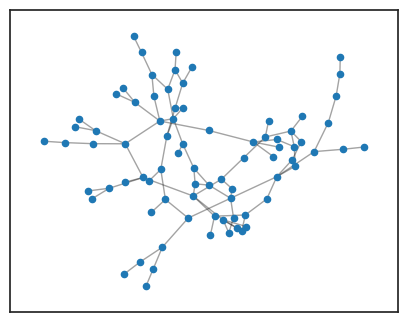

In [7]:
pos = nx.spring_layout(Gcc, seed=2023)

nx.draw_networkx_nodes(Gcc, pos, node_size=20)
nx.draw_networkx_edges(Gcc, pos, alpha=0.4)

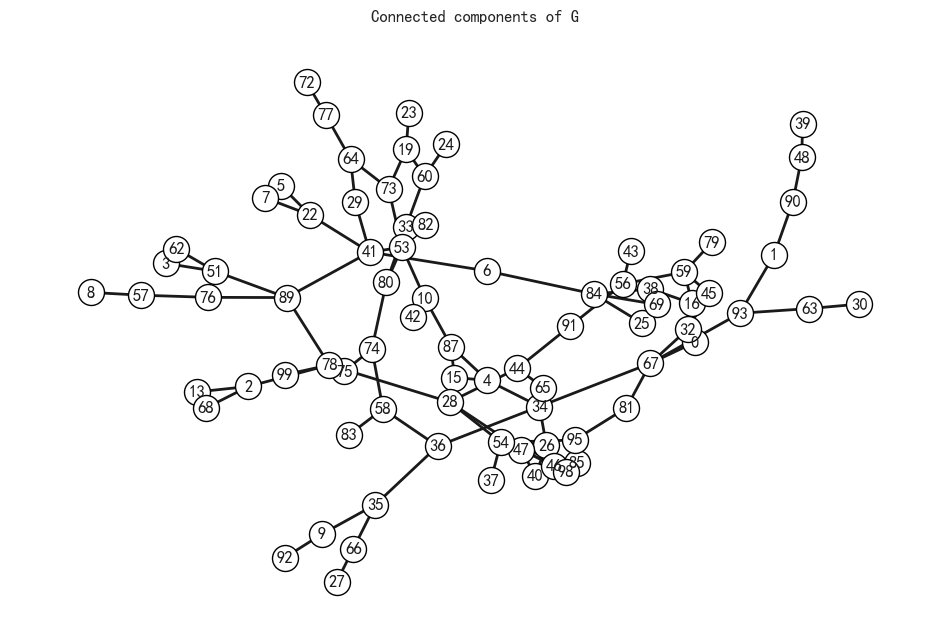

In [10]:
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(Gcc, seed=2023)

# 设置其他可视化形式
options = {
    'font_size':12,
    'node_size':350,
    'node_color':'white',
    'edgecolors':'black',
    'linewidths':1,
    'width':2
}

nx.draw_networkx(Gcc, pos, **options)
plt.title('Connected components of G')
plt.axis('off')
plt.show()

In [11]:
#### 每个结点的连接数（degree）

In [12]:
G.degree()

DegreeView({0: 2, 1: 2, 2: 3, 3: 1, 4: 3, 5: 1, 6: 2, 7: 1, 8: 1, 9: 2, 10: 3, 11: 0, 12: 0, 13: 1, 14: 1, 15: 3, 16: 3, 17: 1, 18: 0, 19: 3, 20: 0, 21: 0, 22: 3, 23: 1, 24: 1, 25: 1, 26: 2, 27: 1, 28: 5, 29: 2, 30: 1, 31: 0, 32: 2, 33: 3, 34: 5, 35: 3, 36: 3, 37: 1, 38: 2, 39: 1, 40: 2, 41: 5, 42: 1, 43: 1, 44: 3, 45: 2, 46: 1, 47: 5, 48: 2, 49: 0, 50: 0, 51: 3, 52: 0, 53: 5, 54: 3, 55: 0, 56: 3, 57: 2, 58: 3, 59: 4, 60: 3, 61: 0, 62: 1, 63: 2, 64: 3, 65: 2, 66: 2, 67: 5, 68: 1, 69: 1, 70: 1, 71: 3, 72: 1, 73: 3, 74: 3, 75: 1, 76: 2, 77: 2, 78: 4, 79: 1, 80: 3, 81: 2, 82: 2, 83: 1, 84: 4, 85: 1, 86: 1, 87: 3, 88: 1, 89: 4, 90: 2, 91: 2, 92: 1, 93: 3, 94: 0, 95: 3, 96: 0, 97: 0, 98: 2, 99: 1})

In [13]:
degree_sequence = sorted((d for n, d in G.degree()), reverse=True)

In [14]:
degree_sequence

[5,
 5,
 5,
 5,
 5,
 5,
 4,
 4,
 4,
 4,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

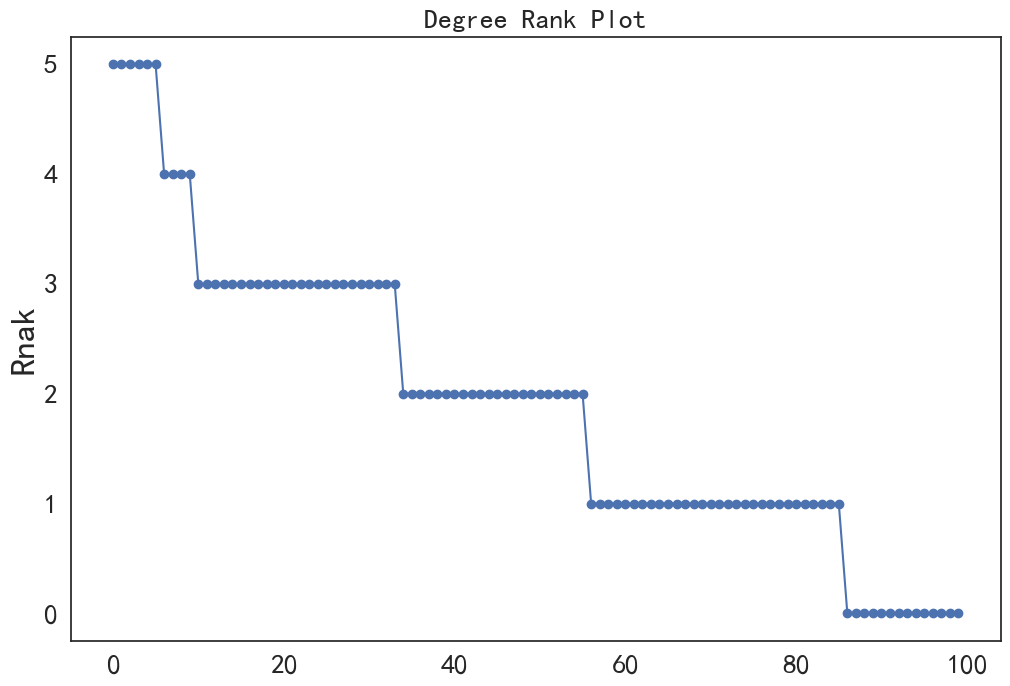

In [15]:
plt.figure(figsize=(12, 8))
plt.plot(degree_sequence, 'b-', marker='o')
plt.title('Degree Rank Plot', fontsize=20)
plt.ylabel('Degree', fontsize=25)
plt.ylabel('Rnak', fontsize=25)
plt.tick_params(labelsize=20)
plt.show()

In [16]:
#### 结点Degree直方图

In [17]:
X = np.unique(degree_sequence, return_counts=True)[0]
Y = np.unique(degree_sequence, return_counts=True)[1]

In [18]:
X

array([0, 1, 2, 3, 4, 5])

In [19]:
Y

array([14, 30, 22, 24,  4,  6], dtype=int64)

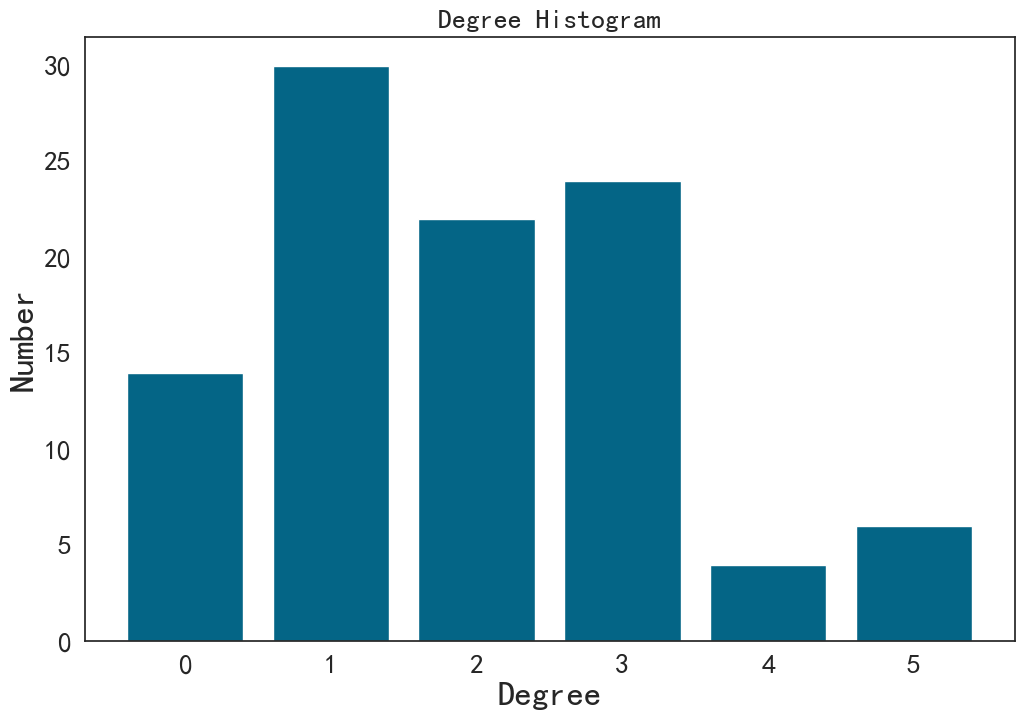

In [20]:
plt.figure(figsize=(12, 8))
plt.bar(X, Y)

plt.title('Degree Histogram', fontsize=20)
plt.ylabel('Number', fontsize=25)
plt.xlabel('Degree', fontsize=25)
plt.tick_params(labelsize=20)
plt.show()

In [21]:
## 棒棒糖图特征分析

In [22]:
### 导入图

In [23]:
# 第一个参数指定头部结点数，第二个参数指定尾部结点数
G = nx.lollipop_graph(4, 7)

In [24]:
###  可视化

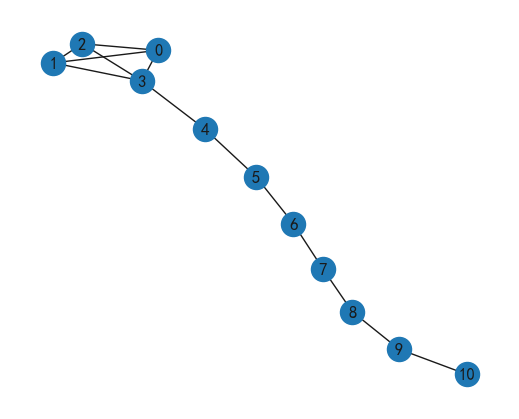

In [25]:
pos = nx.spring_layout(G, seed=2023)
nx.draw(G, pos, with_labels=True)

In [26]:
#### 图数据分析

In [27]:
# 半径
nx.radius(G)

4

In [28]:
# 直径
nx.diameter(G)

8

In [29]:
# 偏心度：每个结点到图中其他结点的最远距离
nx.eccentricity(G)

{0: 8, 1: 8, 2: 8, 3: 7, 4: 6, 5: 5, 6: 4, 7: 5, 8: 6, 9: 7, 10: 8}

In [30]:
# 中心结点，偏心度与半径相等的结点
nx.center(G)

[6]

In [31]:
# 外围结点，偏心度与直径相等的结点
nx.periphery(G)

[0, 1, 2, 10]

In [33]:
nx.density(G)

0.23636363636363636

n为结点个数，m为连接个数
对于无向图：
$$
density = \frac{2m}{n(n-1)}
$$

对于有向图
$$
density = \frac{m}{n(n-1)}
$$
无连接图的density为0，全连接图的density为1，Multigraph（多重连接图）和带self loop的density可能大于1

In [34]:
### 3号结点到图中其他结点的最短距离

In [35]:
node_id = 3
nx.single_source_shortest_path_length(G, node_id)

{3: 0, 0: 1, 1: 1, 2: 1, 4: 1, 5: 2, 6: 3, 7: 4, 8: 5, 9: 6, 10: 7}

In [36]:
### 每两个结点之间的最短距离

In [38]:
pathlength = []
for v in G.nodes():
    spl = nx.single_source_shortest_path_length(G, v)
    for p in spl:
        print(f'{v} --> {p}   最短距离 {spl[p]}')
        pathlength.append(spl[p])

0 --> 0   最短距离 0
0 --> 1   最短距离 1
0 --> 2   最短距离 1
0 --> 3   最短距离 1
0 --> 4   最短距离 2
0 --> 5   最短距离 3
0 --> 6   最短距离 4
0 --> 7   最短距离 5
0 --> 8   最短距离 6
0 --> 9   最短距离 7
0 --> 10   最短距离 8
1 --> 1   最短距离 0
1 --> 0   最短距离 1
1 --> 2   最短距离 1
1 --> 3   最短距离 1
1 --> 4   最短距离 2
1 --> 5   最短距离 3
1 --> 6   最短距离 4
1 --> 7   最短距离 5
1 --> 8   最短距离 6
1 --> 9   最短距离 7
1 --> 10   最短距离 8
2 --> 2   最短距离 0
2 --> 0   最短距离 1
2 --> 1   最短距离 1
2 --> 3   最短距离 1
2 --> 4   最短距离 2
2 --> 5   最短距离 3
2 --> 6   最短距离 4
2 --> 7   最短距离 5
2 --> 8   最短距离 6
2 --> 9   最短距离 7
2 --> 10   最短距离 8
3 --> 3   最短距离 0
3 --> 0   最短距离 1
3 --> 1   最短距离 1
3 --> 2   最短距离 1
3 --> 4   最短距离 1
3 --> 5   最短距离 2
3 --> 6   最短距离 3
3 --> 7   最短距离 4
3 --> 8   最短距离 5
3 --> 9   最短距离 6
3 --> 10   最短距离 7
4 --> 4   最短距离 0
4 --> 3   最短距离 1
4 --> 5   最短距离 1
4 --> 0   最短距离 2
4 --> 1   最短距离 2
4 --> 2   最短距离 2
4 --> 6   最短距离 2
4 --> 7   最短距离 3
4 --> 8   最短距离 4
4 --> 9   最短距离 5
4 --> 10   最短距离 6
5 --> 5   最短距离 0
5 --> 4   最短距离 1
5 --> 6   最短距离 1
5 --> 3  

In [39]:
#平均最短距离
sum(pathlength) / len(pathlength)

3.2231404958677685

In [40]:
### 不同距离的结点对个数

In [41]:
dist = {}
for p in pathlength:
    if p in dist:
        dist[p] += 1
    else:
        dist[p] = 1

dist

{0: 11, 1: 26, 2: 18, 3: 16, 4: 14, 5: 12, 6: 10, 7: 8, 8: 6}

In [42]:
## 计算结点特征

In [43]:
# 导入工具包
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

In [44]:
### 可视化辅助函数

In [46]:
def draw(G, pos, measures, measure_name):
    nodes = nx.draw_networkx_nodes(G, pos, node_size=250, cmap=plt.cm.plasma,
                                   node_color=list(measures.values()),
                                   nodelist=measures.keys())
    
    nodes.set_norm(mcolors.SymLogNorm(linthresh=0.01, linscale=1, base=10))
    
    edges = nx.draw_networkx_edges(G, pos)
    
    plt.title(measure_name)
    plt.colorbar(nodes)
    plt.axis('off')
    plt.show()

In [47]:
### 导入无向图

In [48]:
G = nx.karate_club_graph()

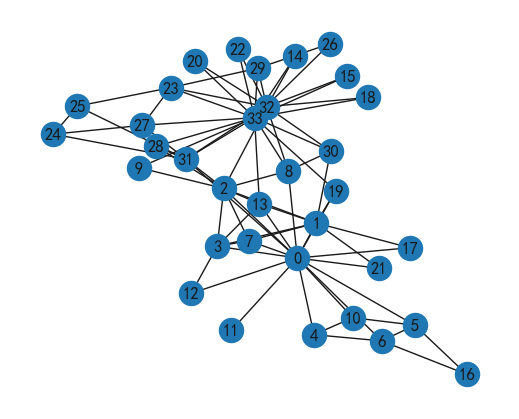

In [50]:
pos = nx.spring_layout(G, seed=2023)
nx.draw(G, pos, with_labels=True)

In [51]:
### 导入有向图

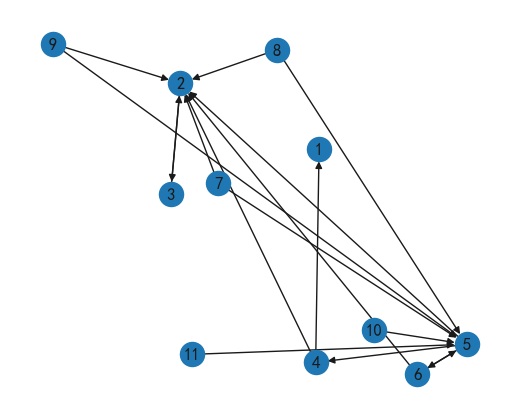

In [52]:
DiG = nx.DiGraph()
DiG.add_edges_from([(2, 3),(3, 2),(4, 1),(4, 2),(5, 2),(5, 4),
                    (5, 6),(6, 2),(6, 5),(7, 2),(7, 5),(8, 2),
                    (8, 5),(9, 2),(9, 5),(10, 5),(11, 5)])
nx.draw(DiG, pos, with_labels=True)

In [53]:
### Node degree

In [54]:
list(nx.degree(G))

[(0, 16),
 (1, 9),
 (2, 10),
 (3, 6),
 (4, 3),
 (5, 4),
 (6, 4),
 (7, 4),
 (8, 5),
 (9, 2),
 (10, 3),
 (11, 1),
 (12, 2),
 (13, 5),
 (14, 2),
 (15, 2),
 (16, 2),
 (17, 2),
 (18, 2),
 (19, 3),
 (20, 2),
 (21, 2),
 (22, 2),
 (23, 5),
 (24, 3),
 (25, 3),
 (26, 2),
 (27, 4),
 (28, 3),
 (29, 4),
 (30, 4),
 (31, 6),
 (32, 12),
 (33, 17)]

In [56]:
dict(G.degree())

{0: 16,
 1: 9,
 2: 10,
 3: 6,
 4: 3,
 5: 4,
 6: 4,
 7: 4,
 8: 5,
 9: 2,
 10: 3,
 11: 1,
 12: 2,
 13: 5,
 14: 2,
 15: 2,
 16: 2,
 17: 2,
 18: 2,
 19: 3,
 20: 2,
 21: 2,
 22: 2,
 23: 5,
 24: 3,
 25: 3,
 26: 2,
 27: 4,
 28: 3,
 29: 4,
 30: 4,
 31: 6,
 32: 12,
 33: 17}

In [59]:
# 字典按值排序
sorted(dict(G.degree()).items(), key=lambda x: x[1], reverse=True)

[(33, 17),
 (0, 16),
 (32, 12),
 (2, 10),
 (1, 9),
 (3, 6),
 (31, 6),
 (8, 5),
 (13, 5),
 (23, 5),
 (5, 4),
 (6, 4),
 (7, 4),
 (27, 4),
 (29, 4),
 (30, 4),
 (4, 3),
 (10, 3),
 (19, 3),
 (24, 3),
 (25, 3),
 (28, 3),
 (9, 2),
 (12, 2),
 (14, 2),
 (15, 2),
 (16, 2),
 (17, 2),
 (18, 2),
 (20, 2),
 (21, 2),
 (22, 2),
 (26, 2),
 (11, 1)]

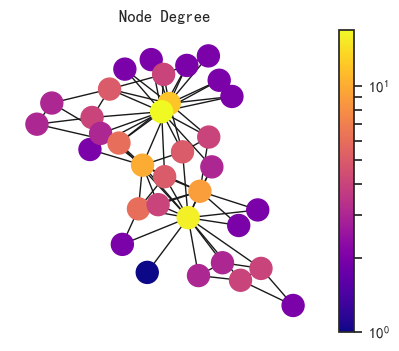

In [61]:
draw(G, pos, dict(G.degree()), 'Node Degree')

In [62]:
#### Degree Centrality-无向图

In [64]:
nx.degree_centrality(G)

{0: 0.48484848484848486,
 1: 0.2727272727272727,
 2: 0.30303030303030304,
 3: 0.18181818181818182,
 4: 0.09090909090909091,
 5: 0.12121212121212122,
 6: 0.12121212121212122,
 7: 0.12121212121212122,
 8: 0.15151515151515152,
 9: 0.06060606060606061,
 10: 0.09090909090909091,
 11: 0.030303030303030304,
 12: 0.06060606060606061,
 13: 0.15151515151515152,
 14: 0.06060606060606061,
 15: 0.06060606060606061,
 16: 0.06060606060606061,
 17: 0.06060606060606061,
 18: 0.06060606060606061,
 19: 0.09090909090909091,
 20: 0.06060606060606061,
 21: 0.06060606060606061,
 22: 0.06060606060606061,
 23: 0.15151515151515152,
 24: 0.09090909090909091,
 25: 0.09090909090909091,
 26: 0.06060606060606061,
 27: 0.12121212121212122,
 28: 0.09090909090909091,
 29: 0.12121212121212122,
 30: 0.12121212121212122,
 31: 0.18181818181818182,
 32: 0.36363636363636365,
 33: 0.5151515151515151}

Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.


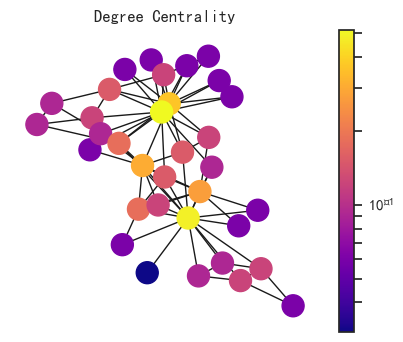

In [66]:
draw(G, pos, nx.degree_centrality(G), 'Degree Centrality')

In [67]:
#### Degree Centrality-有向图

In [68]:
nx.in_degree_centrality(DiG)

{2: 0.7000000000000001,
 3: 0.1,
 4: 0.1,
 1: 0.1,
 5: 0.6000000000000001,
 6: 0.1,
 7: 0.0,
 8: 0.0,
 9: 0.0,
 10: 0.0,
 11: 0.0}

In [69]:
nx.out_degree_centrality(DiG)

{2: 0.1,
 3: 0.1,
 4: 0.2,
 1: 0.0,
 5: 0.30000000000000004,
 6: 0.2,
 7: 0.2,
 8: 0.2,
 9: 0.2,
 10: 0.1,
 11: 0.1}

Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.


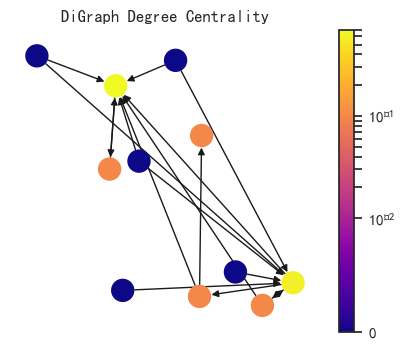

In [70]:
draw(DiG, pos, nx.in_degree_centrality(DiG), 'DiGraph Degree Centrality')

Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.


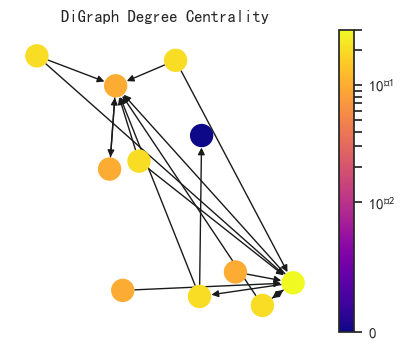

In [71]:
draw(DiG, pos, nx.out_degree_centrality(DiG), 'DiGraph Degree Centrality')

In [72]:
#### Eigenvector Centrality-无向图

Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.


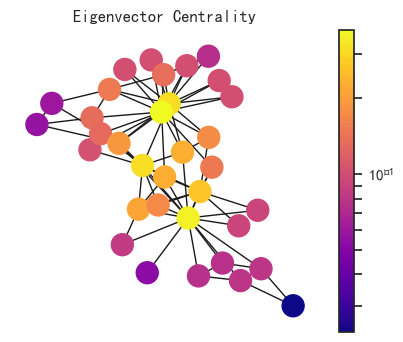

In [73]:
draw(G, pos, nx.eigenvector_centrality(G), 'Eigenvector Centrality')

In [74]:
#### Eigenvector Centrality-有向图

Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.


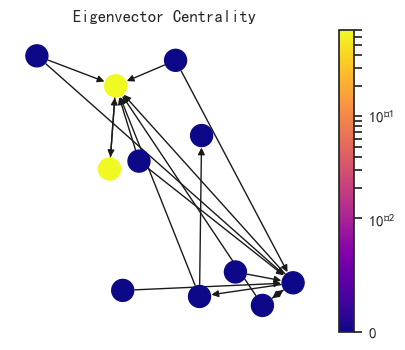

In [75]:
draw(DiG, pos, nx.eigenvector_centrality_numpy(DiG), 'Eigenvector Centrality')

In [76]:
#### Betweeness Centrality (必经之地)

In [77]:
nx.betweenness_centrality(G)

{0: 0.43763528138528146,
 1: 0.053936688311688304,
 2: 0.14365680615680618,
 3: 0.011909271284271283,
 4: 0.0006313131313131313,
 5: 0.02998737373737374,
 6: 0.029987373737373736,
 7: 0.0,
 8: 0.05592682780182781,
 9: 0.0008477633477633478,
 10: 0.0006313131313131313,
 11: 0.0,
 12: 0.0,
 13: 0.04586339586339586,
 14: 0.0,
 15: 0.0,
 16: 0.0,
 17: 0.0,
 18: 0.0,
 19: 0.03247504810004811,
 20: 0.0,
 21: 0.0,
 22: 0.0,
 23: 0.017613636363636363,
 24: 0.0022095959595959595,
 25: 0.0038404882154882154,
 26: 0.0,
 27: 0.02233345358345358,
 28: 0.0017947330447330447,
 29: 0.0029220779220779218,
 30: 0.014411976911976909,
 31: 0.13827561327561325,
 32: 0.145247113997114,
 33: 0.30407497594997596}

Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.


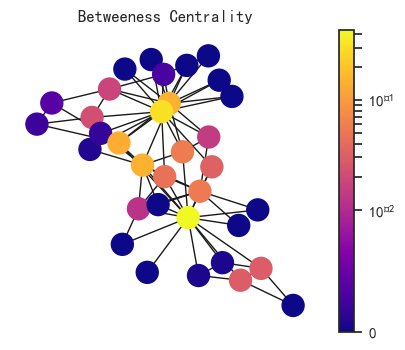

In [78]:
draw(G, pos, nx.betweenness_centrality(G), 'Betweeness Centrality')

In [79]:
#### Closeness Centrality (去哪都近)

In [80]:
nx.closeness_centrality(G)

{0: 0.5689655172413793,
 1: 0.4852941176470588,
 2: 0.559322033898305,
 3: 0.4647887323943662,
 4: 0.3793103448275862,
 5: 0.38372093023255816,
 6: 0.38372093023255816,
 7: 0.44,
 8: 0.515625,
 9: 0.4342105263157895,
 10: 0.3793103448275862,
 11: 0.36666666666666664,
 12: 0.3707865168539326,
 13: 0.515625,
 14: 0.3707865168539326,
 15: 0.3707865168539326,
 16: 0.28448275862068967,
 17: 0.375,
 18: 0.3707865168539326,
 19: 0.5,
 20: 0.3707865168539326,
 21: 0.375,
 22: 0.3707865168539326,
 23: 0.39285714285714285,
 24: 0.375,
 25: 0.375,
 26: 0.3626373626373626,
 27: 0.4583333333333333,
 28: 0.4520547945205479,
 29: 0.38372093023255816,
 30: 0.4583333333333333,
 31: 0.5409836065573771,
 32: 0.515625,
 33: 0.55}

Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does n

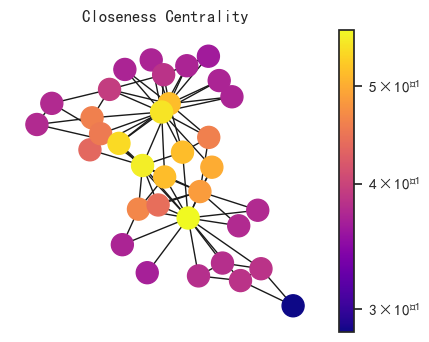

In [81]:
draw(G, pos, nx.closeness_centrality(G), 'Closeness Centrality')

In [82]:
### PageRank

In [83]:
nx.pagerank(DiG, alpha=0.8)

{2: 0.35498362527288035,
 3: 0.3050906960724587,
 4: 0.04755306418089125,
 1: 0.04012092964665928,
 5: 0.09920010077470663,
 6: 0.04755306418089125,
 7: 0.021099703974302532,
 8: 0.021099703974302532,
 9: 0.021099703974302532,
 10: 0.021099703974302532,
 11: 0.021099703974302532}

Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.


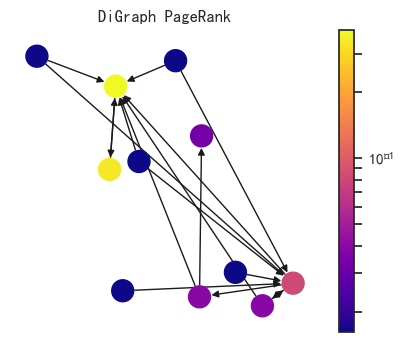

In [84]:
draw(DiG, pos, nx.pagerank(DiG, alpha=0.85), 'DiGraph PageRank')

In [85]:
### Katz Centrality

Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does n

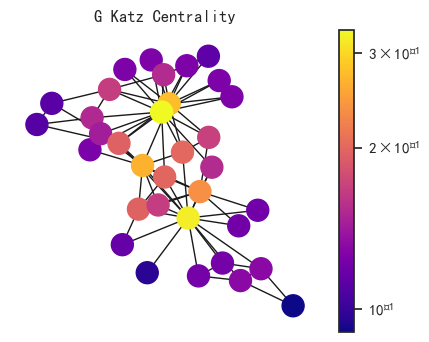

In [88]:
draw(G, pos, nx.katz_centrality(G, alpha=0.1, beta=1.0), 'G Katz Centrality')

Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.


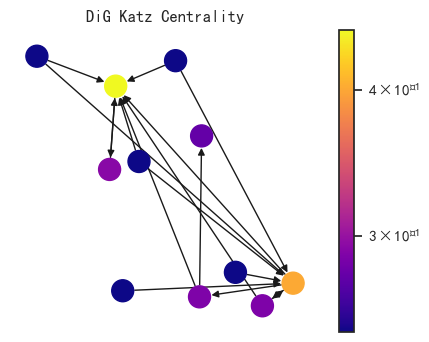

In [87]:
draw(DiG, pos, nx.katz_centrality(DiG, alpha=0.1, beta=1.0), 'DiG Katz Centrality')

In [89]:
### HITS Hubs and Authorities

Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.


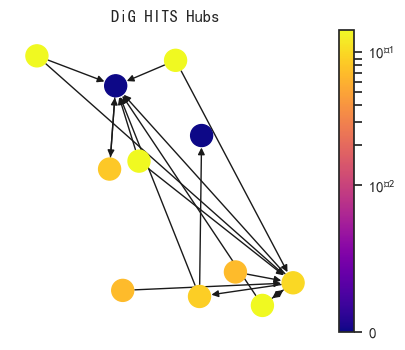

Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.


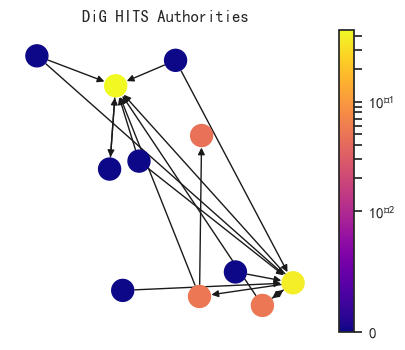

In [90]:
h, a = nx.hits(DiG)
draw(DiG, pos, h, 'DiG HITS Hubs')
draw(DiG, pos, a, 'DiG HITS Authorities')

In [91]:
#### NetworkX 社群属性

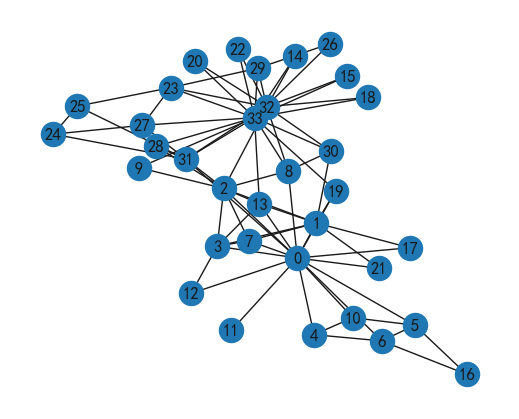

In [92]:
nx.draw(G, pos, with_labels=True)

In [93]:
#### 三角形个数

In [94]:
nx.triangles(G)

{0: 18,
 1: 12,
 2: 11,
 3: 10,
 4: 2,
 5: 3,
 6: 3,
 7: 6,
 8: 5,
 9: 0,
 10: 2,
 11: 0,
 12: 1,
 13: 6,
 14: 1,
 15: 1,
 16: 1,
 17: 1,
 18: 1,
 19: 1,
 20: 1,
 21: 1,
 22: 1,
 23: 4,
 24: 1,
 25: 1,
 26: 1,
 27: 1,
 28: 1,
 29: 4,
 30: 3,
 31: 3,
 32: 13,
 33: 15}

Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.


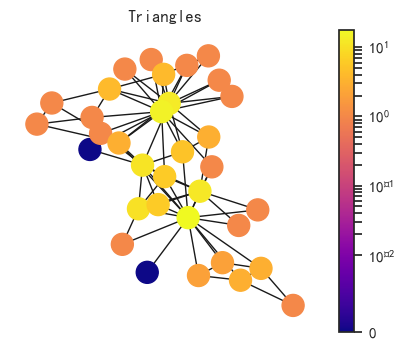

In [96]:
draw(G, pos, nx.triangles(G), 'Triangles')

In [97]:
#### Clustering Coefficient

In [98]:
nx.clustering(G)

{0: 0.15,
 1: 0.3333333333333333,
 2: 0.24444444444444444,
 3: 0.6666666666666666,
 4: 0.6666666666666666,
 5: 0.5,
 6: 0.5,
 7: 1.0,
 8: 0.5,
 9: 0,
 10: 0.6666666666666666,
 11: 0,
 12: 1.0,
 13: 0.6,
 14: 1.0,
 15: 1.0,
 16: 1.0,
 17: 1.0,
 18: 1.0,
 19: 0.3333333333333333,
 20: 1.0,
 21: 1.0,
 22: 1.0,
 23: 0.4,
 24: 0.3333333333333333,
 25: 0.3333333333333333,
 26: 1.0,
 27: 0.16666666666666666,
 28: 0.3333333333333333,
 29: 0.6666666666666666,
 30: 0.5,
 31: 0.2,
 32: 0.19696969696969696,
 33: 0.11029411764705882}

Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.


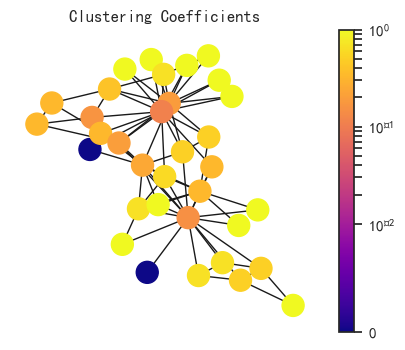

In [99]:
draw(G, pos, nx.clustering(G), 'Clustering Coefficients')

#### Bridges
如果某个连接断掉，会使连通域个数增加，则该连接是bridg

bridge不属于环的一部分

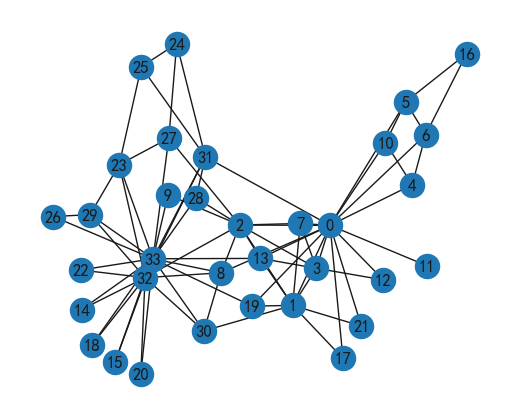

In [100]:
pos = nx.spring_layout(G, seed=675)
nx.draw(G, pos, with_labels=True)

In [101]:
list(nx.bridges(G))

[(0, 11)]

In [102]:
#### Common Neighbors 和 Jaccard Coefficient

In [103]:
sorted(nx.common_neighbors(G, 0, 4))

[6, 10]

In [104]:
preds = nx.jaccard_coefficient(G, [(0, 1), (2, 3)])
for u, v, p in preds:
    print(f'({u}, {v}) -> {p:.8f}')

(0, 1) -> 0.38888889
(2, 3) -> 0.33333333


In [105]:
preds = nx.adamic_adar_index(G, [(0, 1), (2, 3)])
for u, v, p in preds:
    print(f'({u}, {v}) -> {p:.8f}')

(0, 1) -> 6.13071687
(2, 3) -> 2.15847583


#### Katz Index
结点u到结点v，路径为k的路径个数

In [106]:
import networkx as nx
import numpy as np
from numpy.linalg import inv

G = nx.karate_club_graph()

In [107]:
len(G.nodes())

34

In [108]:
# 计算主特征向量
L = nx.normalized_laplacian_matrix(G)
e = np.linalg.eigvals(L.A)
print(f'最大特征值', max(e))

# 折减系数
beta = 1/max(e)

# 创建单位矩阵
I = np.identity(len(G.nodes()))

# 计算Katz index
S = inv(I - nx.to_numpy_array(G) * beta) - I

最大特征值 1.7146113474736127


In [109]:
S.shape

(34, 34)

In [111]:
S

array([[-0.630971  ,  0.03760311, -0.50718655, ...,  0.22028562,
         0.08051109,  0.0187629 ],
       [ 0.03760311,  0.0313979 , -1.09231501, ...,  0.18920621,
        -0.09098329,  0.08188737],
       [-0.50718655, -1.09231501,  0.79993439, ..., -0.4511988 ,
         0.17631358, -0.23914987],
       ...,
       [ 0.22028562,  0.18920621, -0.4511988 , ..., -0.07349891,
         0.47525815, -0.0457034 ],
       [ 0.08051109, -0.09098329,  0.17631358, ...,  0.47525815,
        -0.28781332, -0.70104834],
       [ 0.0187629 ,  0.08188737, -0.23914987, ..., -0.0457034 ,
        -0.70104834, -0.50717615]])

In [112]:
## 北京上海地铁站图数据挖掘

In [113]:
#### 定义可视化辅助函数

In [114]:
def draw(G, pos, measures, measure_name):
    nodes = nx.draw_networkx_nodes(G, pos, node_size=250, cmap=plt.cm.plasma,
                                   node_color=list(measures.values()),
                                   nodelist=measures.keys())
    
    nodes.set_norm(mcolors.SymLogNorm(linthresh=0.01, linscale=1, base=10))
    
    edges = nx.draw_networkx_edges(G, pos)
    
    plt.title(measure_name)
    plt.colorbar(nodes)
    plt.axis('off')
    plt.show()

In [116]:
#### 字典按值排序辅助函数

In [117]:
def dict_sort_by_value(dict_input):
    """
    输入字典，输出按值排序的字典 
    """
    return sorted(dict_input.items(), key=lambda x: x[1], reverse=True)

In [118]:
#### 导入地铁站连接表

In [122]:
# 上海地铁站连接表
import pandas as pd
df = pd.read_csv(r'./data/shanghai_subway.csv')

In [123]:
df

,前一站,后一站,地铁线,时间（分钟）
0,莘庄,外环路,1,2
1,外环路,莲花路,1,2
2,莲花路,锦江乐园,1,3
3,锦江乐园,上海南站,1,3
4,上海南站,漕宝路,1,3
...,...,...,...,...
487,抚顺路,国权路,18,2
488,国权路,复旦大学,18,3
489,复旦大学,上海财经大学,18,2
490,上海财经大学,殷高路,18,2


In [124]:
#### 创建图

#### 创建无向图

In [128]:
G = nx.Graph()

#### 从连接表创建图

In [129]:
for idx, row in df.iterrows():
    G.add_edges_from([(row['前一站'], row['后一站'])], line=row['地铁线'], time=row['时间（分钟）'])

In [130]:
#### 检查是否导入成功

In [131]:
# 节点个数
G.number_of_nodes()

402

In [132]:
# 连接个数
G.number_of_edges()

480

In [136]:
# 查看连接特征
G.edges[('同济大学', '四平路')]

{'line': 10, 'time': 2}

In [137]:
#### 可视化

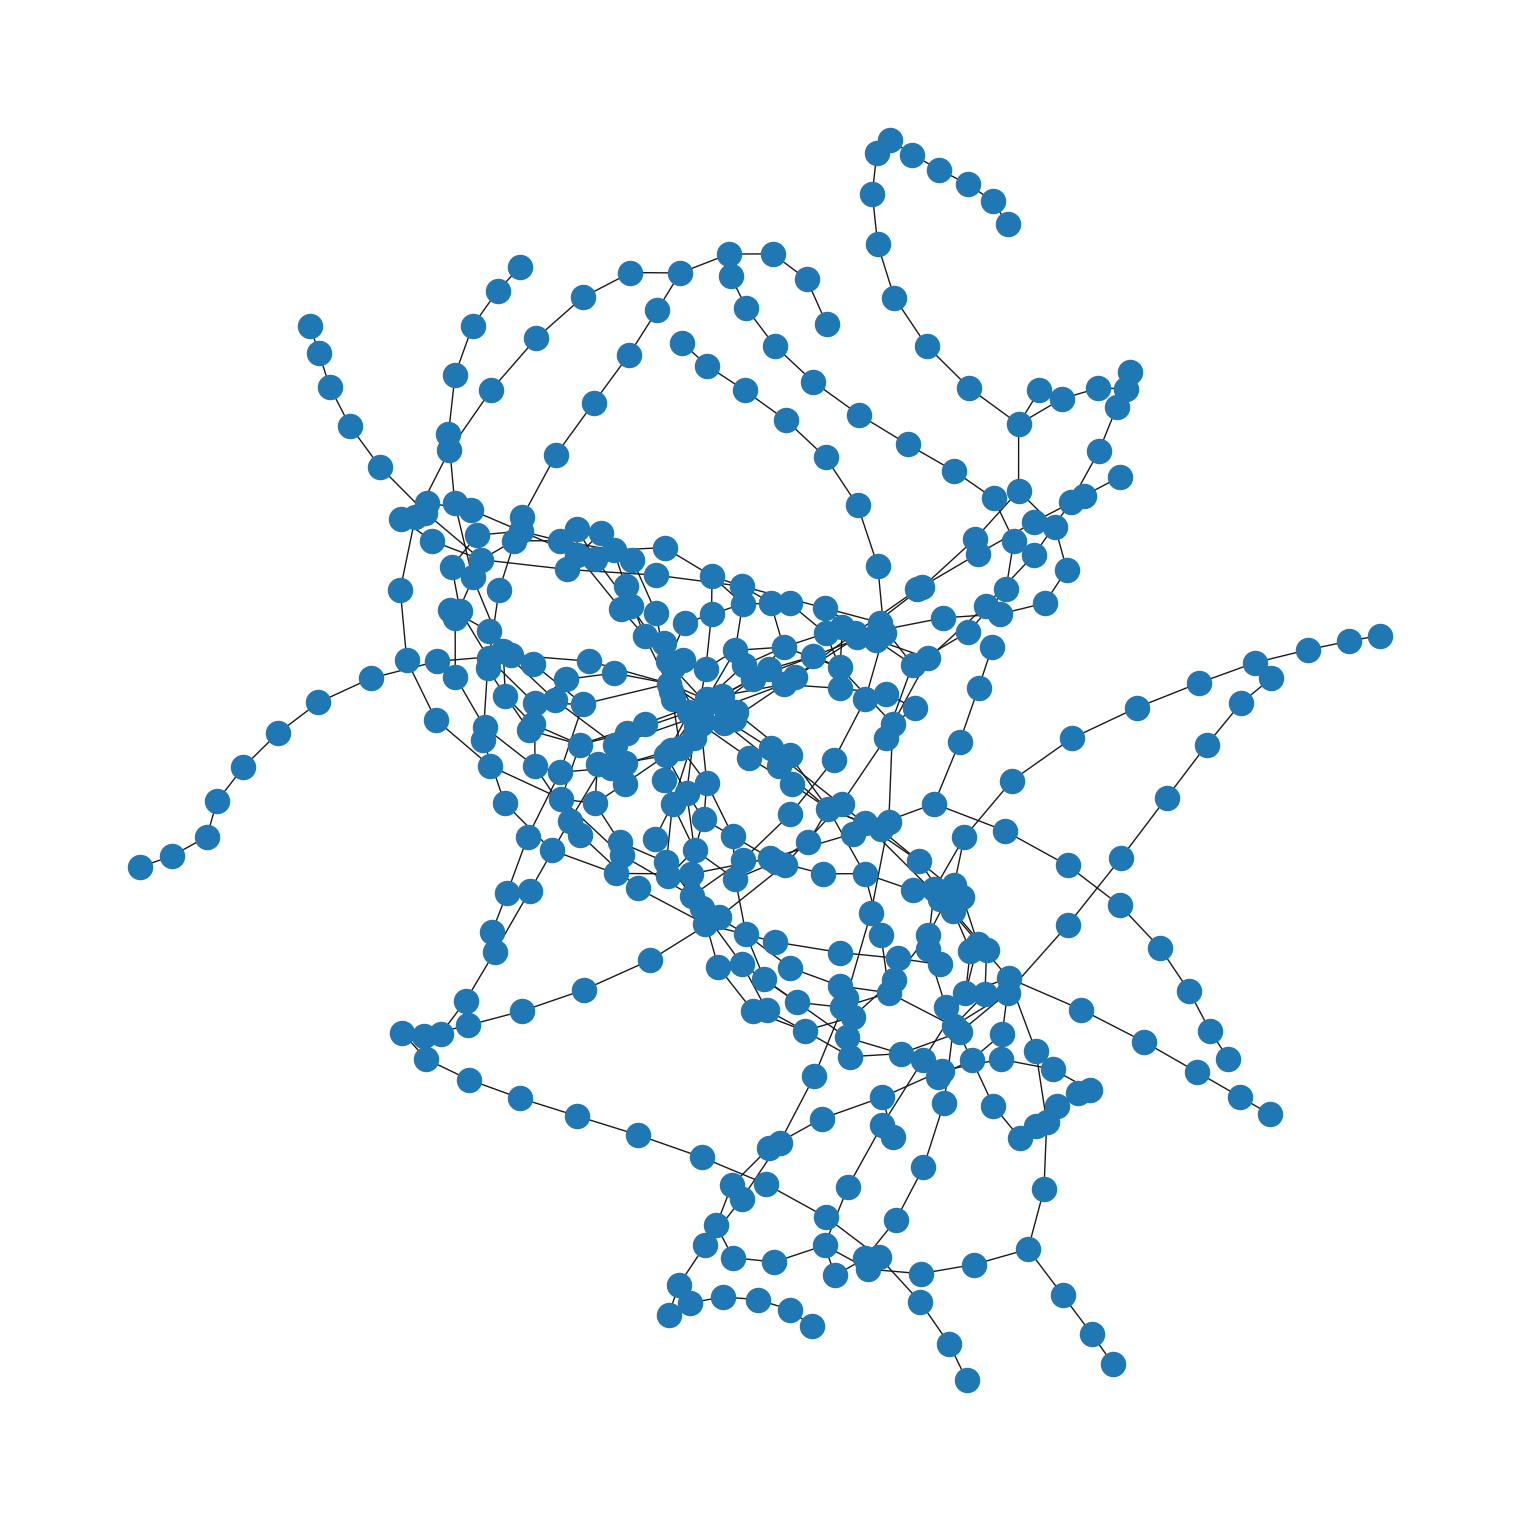

In [138]:
# j结点排版布局，默认弹簧布局
pos = nx.spring_layout(G, seed=123)
plt.figure(figsize=(15, 15))
nx.draw(G, pos)

In [139]:
#### shorest path 最短路径

In [141]:
# 任意两节点之间是否存在路径
nx.has_path(G, source='昌吉东路', target='同济大学')

True

In [142]:
# 任意两结点之间的最短路径
nx.shortest_path(G, source='昌吉东路', target='同济大学', weight='time')

['昌吉东路',
 '上海赛车场',
 '嘉定新城',
 '马陆',
 '陈翔公路',
 '南翔',
 '桃浦新村',
 '武威路',
 '祁连山路',
 '李子园',
 '上海西站',
 '真如',
 '枫桥路',
 '曹杨路',
 '镇坪路',
 '中潭路',
 '上海火车站',
 '宝山路',
 '海伦路',
 '邮电新村',
 '四平路',
 '同济大学']

In [143]:
# 任意两结点之间的最短路径
nx.shortest_path_length(G, source='昌吉东路', target='同济大学', weight='time')

59

In [144]:
# 全图平均最短路径
nx.average_shortest_path_length(G, weight='time')

41.06494956638255

In [147]:
# 某一站去其他站的最短路径
# nx.single_source_shortest_path(G, source='同济大学')

# # 某一站去其他站的最短路径长度
# nx.single_source_shortest_path_length(G, source='同济大学')

In [148]:
## 地铁导航系统

In [149]:
# 指定起始站和终点站
A_station = '昌吉东路'
B_station = '同济大学'

# 获取最短路径
shorest_path_list = nx.shortest_path(G, source=A_station, target=B_station, weight='time')

for i in range(len(shorest_path_list) - 1):
    previous_station = shorest_path_list[i]
    next_station = shorest_path_list[i + 1]
    line_id = G.edges[(previous_station, next_station)]['line']
    time = G.edges[(previous_station, next_station)]['time']
    print(f'{previous_station} -> {next_station}  {line_id}号线  {time}分钟')

昌吉东路 -> 上海赛车场  11号线  4分钟
上海赛车场 -> 嘉定新城  11号线  4分钟
嘉定新城 -> 马陆  11号线  3分钟
马陆 -> 陈翔公路  11号线  4分钟
陈翔公路 -> 南翔  11号线  3分钟
南翔 -> 桃浦新村  11号线  3分钟
桃浦新村 -> 武威路  11号线  3分钟
武威路 -> 祁连山路  11号线  2分钟
祁连山路 -> 李子园  11号线  3分钟
李子园 -> 上海西站  11号线  2分钟
上海西站 -> 真如  11号线  3分钟
真如 -> 枫桥路  11号线  2分钟
枫桥路 -> 曹杨路  11号线  2分钟
曹杨路 -> 镇坪路  4号线  3分钟
镇坪路 -> 中潭路  4号线  2分钟
中潭路 -> 上海火车站  4号线  3分钟
上海火车站 -> 宝山路  4号线  4分钟
宝山路 -> 海伦路  4号线  3分钟
海伦路 -> 邮电新村  10号线  2分钟
邮电新村 -> 四平路  10号线  2分钟
四平路 -> 同济大学  10号线  2分钟


In [150]:
### Node Degree

In [154]:
# dict_sort_by_value(dict(G.degree()))

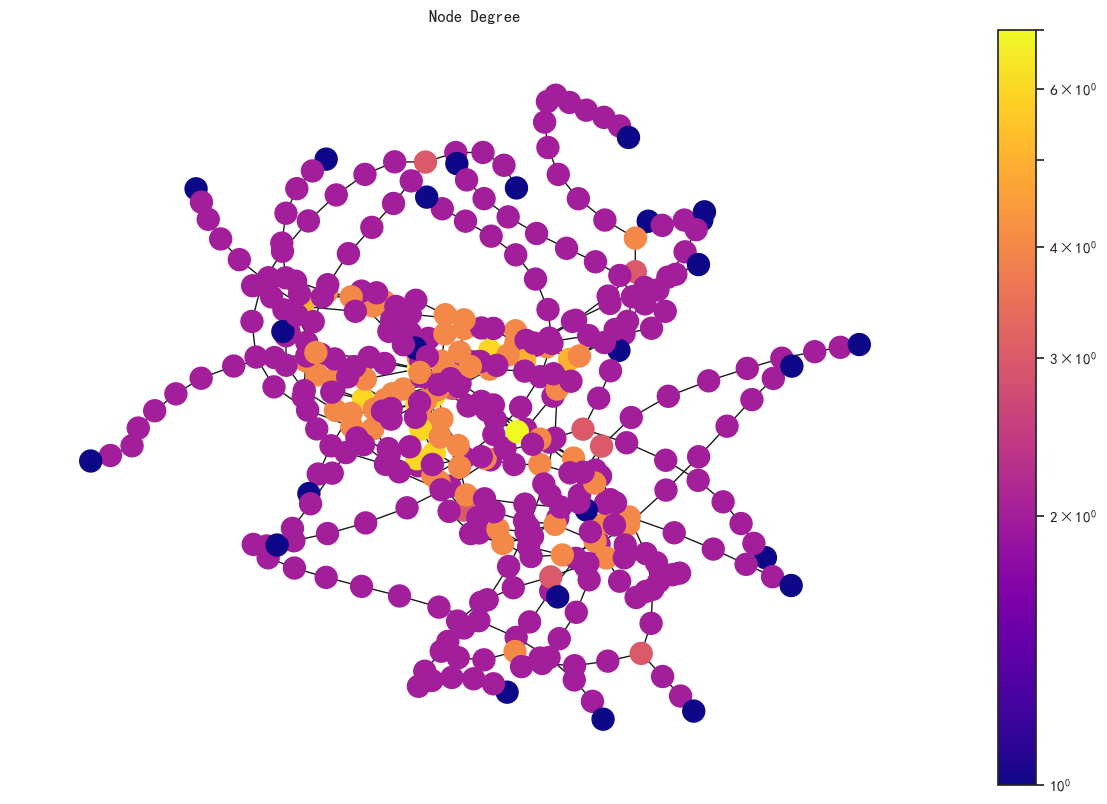

In [163]:
plt.figure(figsize=(15, 10))
draw(G, pos, dict(G.degree()), 'Node Degree')

Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.


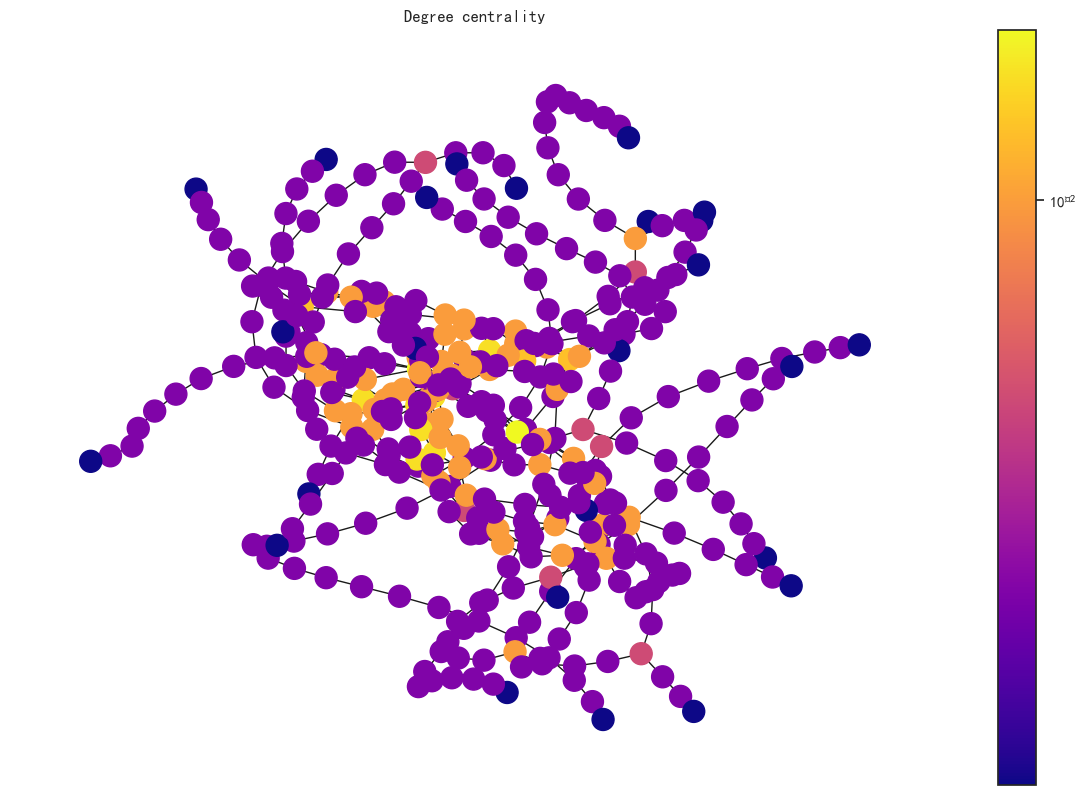

In [165]:
plt.figure(figsize=(15, 10))
draw(G, pos, nx.degree_centrality(G), 'Degree centrality')

In [166]:
### Eigenvector Centrality (可能不收敛)

In [168]:
# nx.eigenvector_centrality(G)

Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.


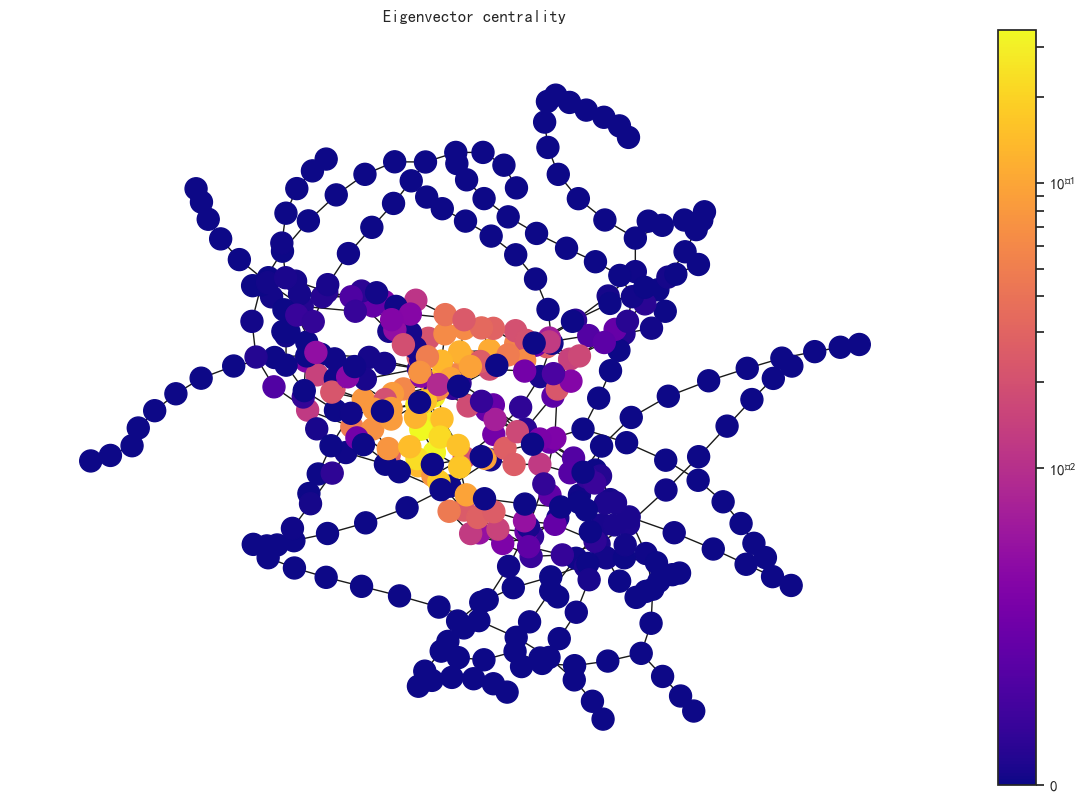

In [169]:
plt.figure(figsize=(15, 10))
draw(G, pos, nx.eigenvector_centrality(G), 'Eigenvector centrality')

In [171]:
### Closeness centrality (去哪都近)

Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.


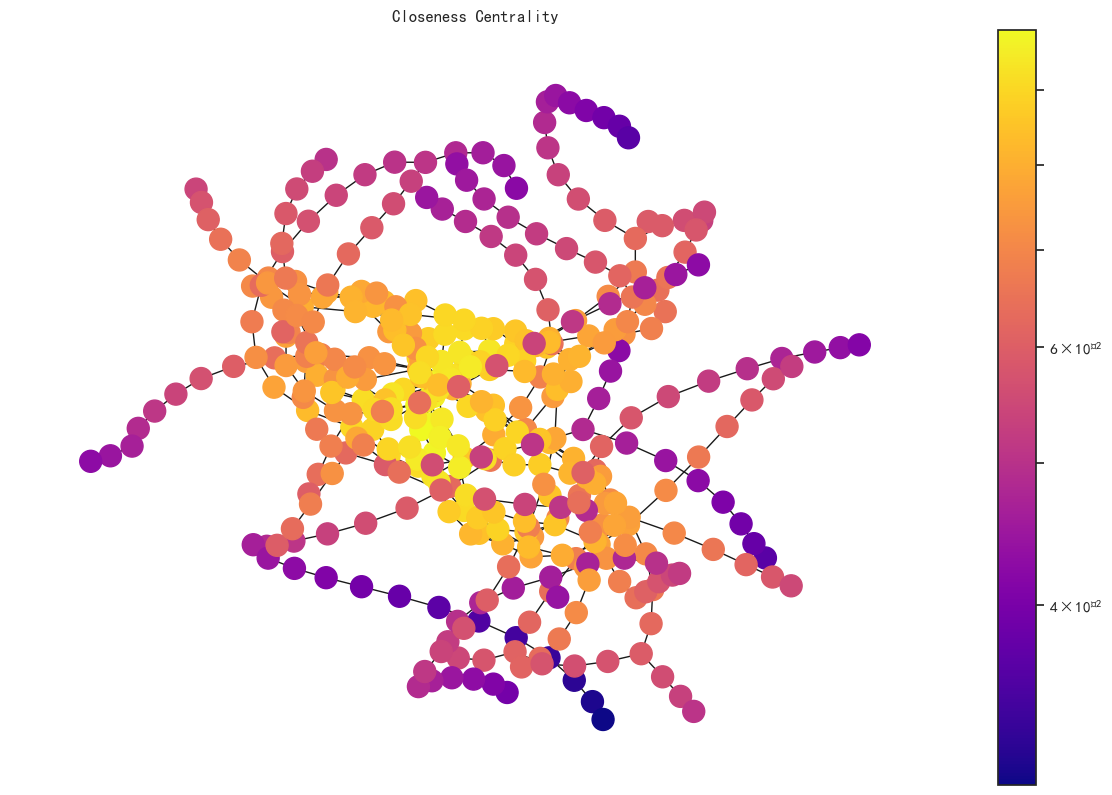

In [172]:
plt.figure(figsize=(15, 10))
draw(G, pos, nx.closeness_centrality(G), 'Closeness Centrality')

In [173]:
#### PageRank

Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.


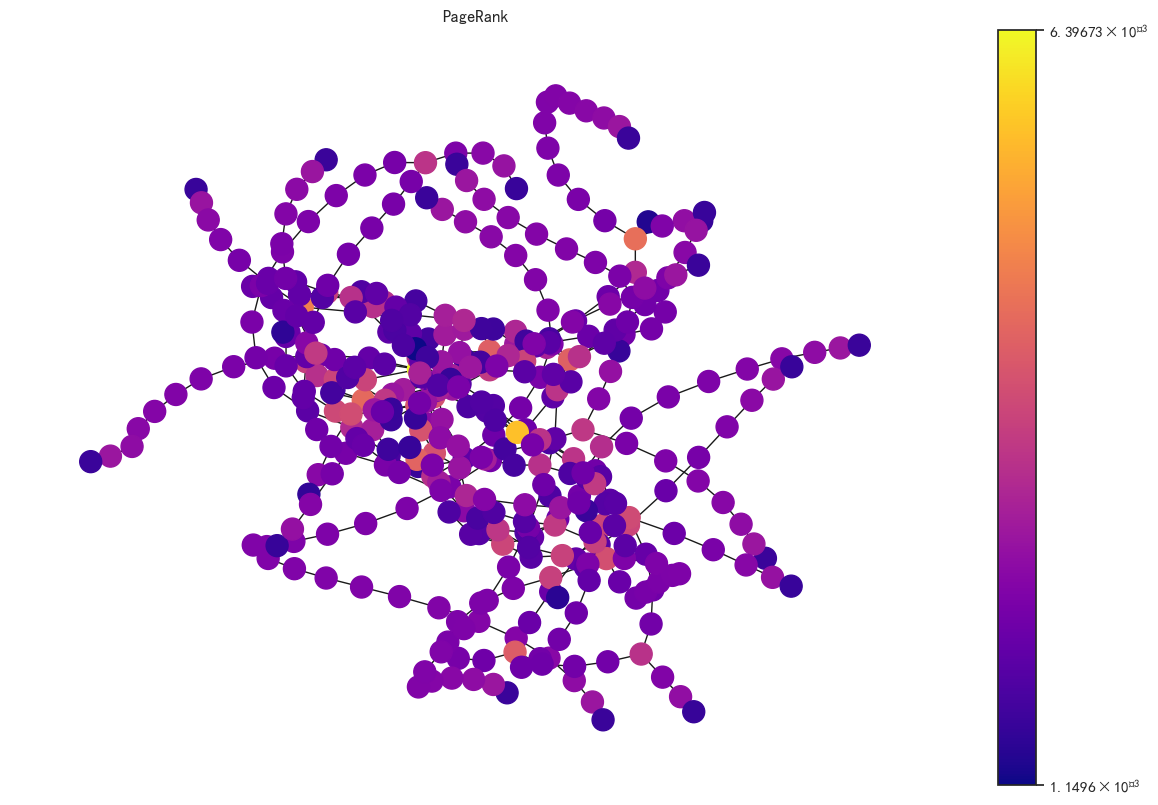

In [174]:
plt.figure(figsize=(15, 10))
draw(G, pos, nx.pagerank(G), 'PageRank')

In [175]:
### 社群属性Clustering

In [176]:
#### 三角形个数

In [179]:
# nx.triangles(G)
# dict_sort_by_value(nx.triangles(G))

Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.


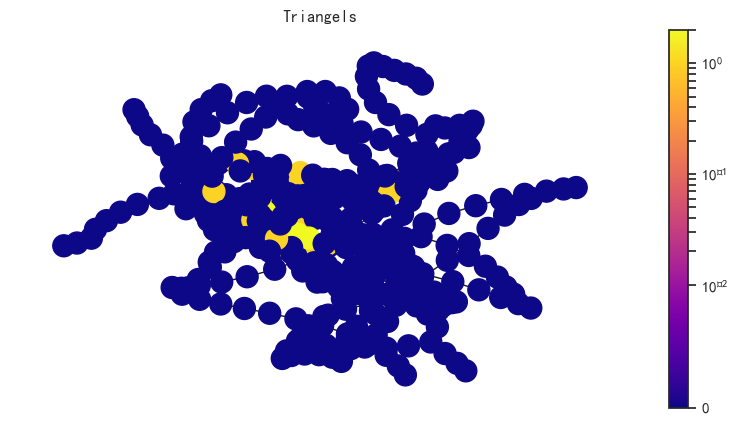

In [183]:
plt.figure(figsize=(10, 5))
draw(G, pos, nx.triangles(G), 'Triangels')

In [184]:
#### Clustering coefficients

Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.


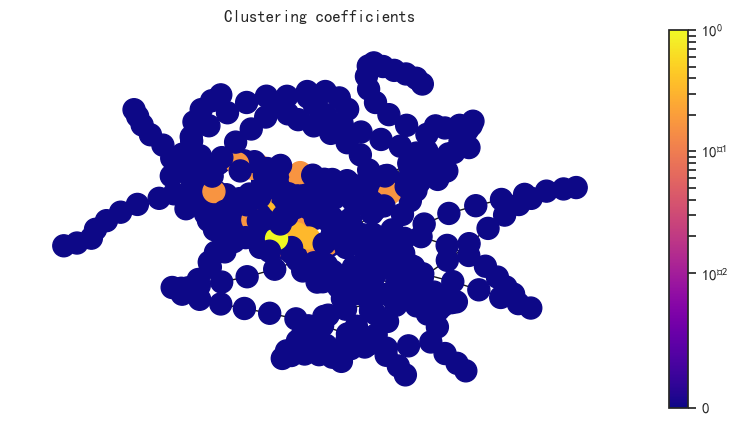

In [189]:
plt.figure(figsize=(10, 5))
draw(G, pos, nx.clustering(G), 'Clustering coefficients')

In [190]:
### 计算全图Graphlet个数

In [191]:
import itertools

In [192]:
#### 导入全图

In [193]:
G = nx.karate_club_graph()

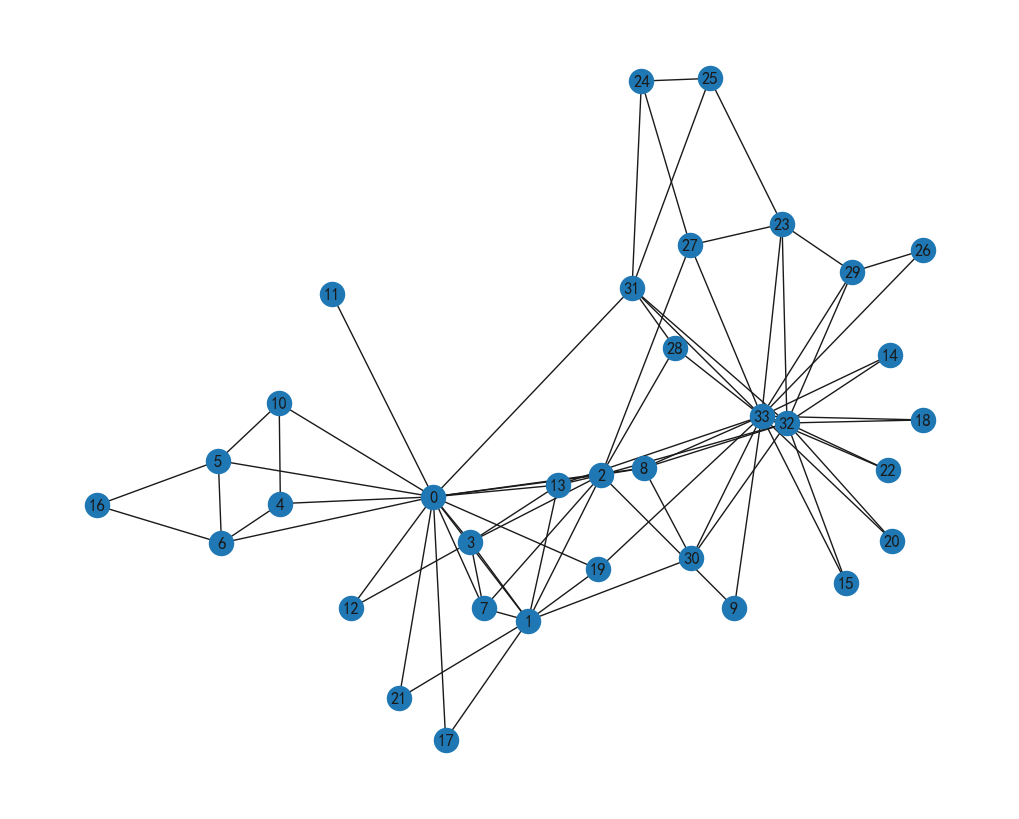

In [194]:
plt.figure(figsize=(10, 8))
pos = nx.spring_layout(G, seed=123)
nx.draw(G, pos, with_labels=True)

In [195]:
#### 指定Graphlet

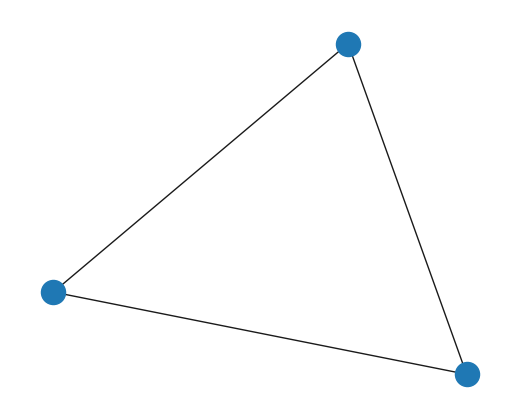

In [198]:
target = nx.complete_graph(3)
nx.draw(target)

In [199]:
#### 匹配Graphlet,统计个数

In [200]:
num = 0
for sub_nodes in itertools.combinations(G.nodes(), len(target.nodes())): # 遍历全图中，符合graphlet结点个数的所有结点组合
    subg = G.subgraph(sub_nodes) # 从全图中抽取子图
    if nx.is_connected(subg) and nx.is_isomorphic(subg, target): # 如果子图是完整连通域 并且符合graphlet特征。输出原图结点编号
        num += 1
        print(subg.edges()) 

[(0, 1), (0, 2), (1, 2)]
[(0, 1), (0, 3), (1, 3)]
[(0, 1), (0, 7), (1, 7)]
[(0, 1), (0, 13), (1, 13)]
[(0, 1), (0, 17), (1, 17)]
[(0, 1), (0, 19), (1, 19)]
[(0, 1), (0, 21), (1, 21)]
[(0, 2), (0, 3), (2, 3)]
[(0, 2), (0, 7), (2, 7)]
[(0, 2), (0, 8), (8, 2)]
[(0, 2), (0, 13), (2, 13)]
[(0, 3), (0, 7), (3, 7)]
[(0, 3), (0, 12), (3, 12)]
[(0, 3), (0, 13), (3, 13)]
[(0, 4), (0, 6), (4, 6)]
[(0, 4), (0, 10), (10, 4)]
[(0, 5), (0, 6), (5, 6)]
[(0, 5), (0, 10), (10, 5)]
[(1, 2), (1, 3), (2, 3)]
[(1, 2), (1, 7), (2, 7)]
[(1, 2), (1, 13), (2, 13)]
[(1, 3), (1, 7), (3, 7)]
[(1, 3), (1, 13), (3, 13)]
[(2, 3), (2, 7), (3, 7)]
[(2, 3), (2, 13), (3, 13)]
[(8, 2), (8, 32), (2, 32)]
[(16, 5), (16, 6), (5, 6)]
[(8, 30), (8, 32), (32, 30)]
[(8, 30), (8, 33), (33, 30)]
[(8, 32), (8, 33), (33, 32)]
[(32, 14), (32, 33), (33, 14)]
[(32, 15), (32, 33), (33, 15)]
[(32, 18), (32, 33), (33, 18)]
[(32, 20), (32, 33), (33, 20)]
[(32, 22), (32, 33), (33, 22)]
[(33, 23), (33, 27), (27, 23)]
[(32, 23), (32, 29), (29

In [201]:
### 拉普拉斯矩阵特征值分解

In [202]:
#### 创建图

In [203]:
n = 1000 # 结点个数
m = 5000 # 连接个数
G = nx.gnm_random_graph(n, m, seed=5040)

In [204]:
#### 邻接矩阵（Adjacency Matrix）

In [205]:
A = nx.adjacency_matrix(G)

In [206]:
A.shape

(1000, 1000)

In [208]:
A.todense()

matrix([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=int32)

#### 拉普拉斯矩阵（Laplacian Matrix）
$$
L = D - A
$$
L 为拉普拉斯矩阵

D 为结点degree对角矩阵

A 为邻接矩阵

In [209]:
L = nx.laplacian_matrix(G)

In [210]:
L.shape

(1000, 1000)

In [211]:
# 结点degree对角矩阵
D = L + A

In [212]:
D.todense()

matrix([[12,  0,  0, ...,  0,  0,  0],
        [ 0,  6,  0, ...,  0,  0,  0],
        [ 0,  0,  8, ...,  0,  0,  0],
        ...,
        [ 0,  0,  0, ...,  8,  0,  0],
        [ 0,  0,  0, ...,  0,  6,  0],
        [ 0,  0,  0, ...,  0,  0,  7]], dtype=int32)

#### 归一化拉普拉斯矩阵（Normalized Laplacian Matrix）
$L_n = D^{-\frac{1}{2}}LD^{-\frac{1}{2}}$

In [213]:
L_n = nx.normalized_laplacian_matrix(G)

In [214]:
L_n.shape

(1000, 1000)

In [215]:
L_n.todense()

matrix([[1., 0., 0., ..., 0., 0., 0.],
        [0., 1., 0., ..., 0., 0., 0.],
        [0., 0., 1., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 1., 0., 0.],
        [0., 0., 0., ..., 0., 1., 0.],
        [0., 0., 0., ..., 0., 0., 1.]])

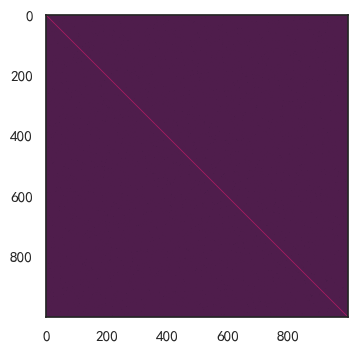

In [217]:
plt.imshow(L_n.todense())

In [218]:
#### 特征值分解

In [219]:
e = np.linalg.eigvals(L_n.A)

In [221]:
max(e)

1.5924617911775976

In [222]:
#### 特征值分布直方图

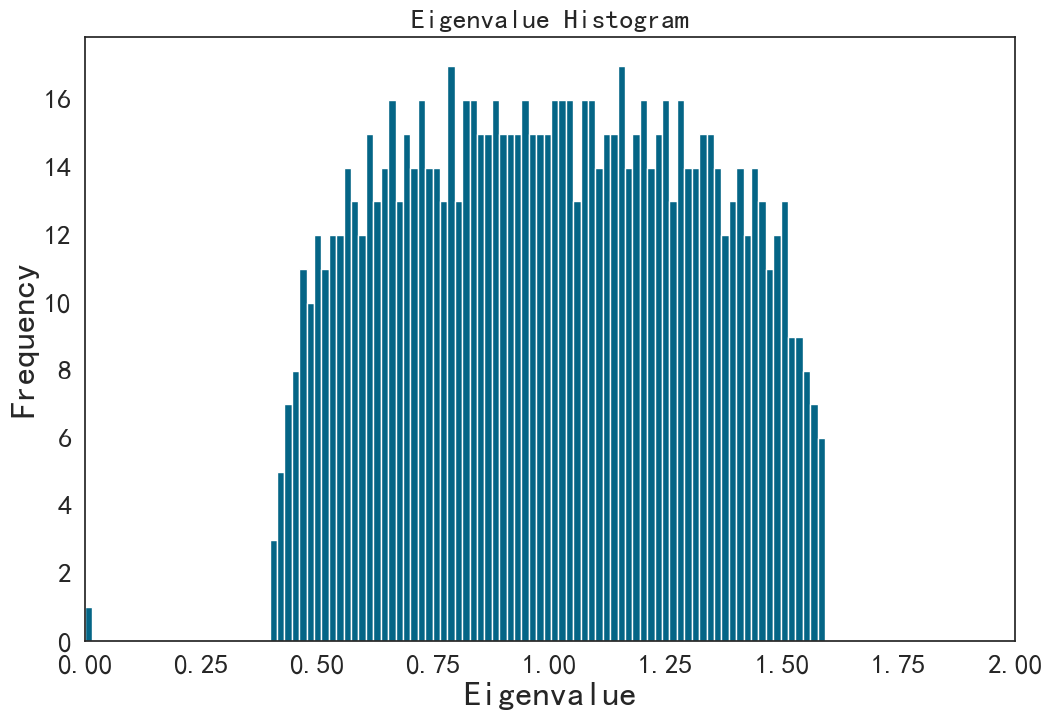

In [224]:
plt.figure(figsize=(12, 8))

plt.hist(e, bins=100)
plt.xlim(0, 2)

plt.title('Eigenvalue Histogram', fontsize=20)
plt.ylabel('Frequency', fontsize=25)
plt.xlabel('Eigenvalue', fontsize=25)
plt.tick_params(labelsize=20)
plt.show()